In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "ÎÇ®Íµ¨"
region_code = "5"
target_date = "2018-01-04"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("ÎÇ®Íµ¨2018_1q.csv", index=False, encoding="utf-8-sig")

ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2018-01-04   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   7425     ÎÇ®Íµ¨  16135     ÎÇ®Íµ¨   
1   2018-01-04     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6300     ÎÇ®Íµ¨   6300     ÎÇ®Íµ¨   
2   2018-01-04    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   2487     ÎÇ®Íµ¨   3500     ÎÇ®Íµ¨   
3   2018-01-04     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2680     ÎÇ®Íµ¨   2880     ÎÇ®Íµ¨   
4   2018-01-04    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   4600     ÎÇ®Íµ¨   4990     ÎÇ®Íµ¨   
5   2018-01-04     ÎåÄÌåå                      1.0„éè   3100     ÎÇ®Íµ¨   3722     ÎÇ®Íµ¨   
6   2018-01-04   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   8950     ÎÇ®Íµ¨  14250     ÎÇ®Íµ¨   
7   2018-01-04     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4365     ÎÇ®Íµ¨   5380     ÎÇ®Íµ¨   
8   2018-01-04     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676     ÎÇ®Íµ¨    676     ÎÇ®Íµ¨   
9   2018-01-04     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1400     ÎÇ®Íµ¨   1410     ÎÇ®Íµ¨   
10  2018-01-04      Î¨¥                   2.0„éè 1Í∞ú   2346     ÎÇ®Íµ¨   2373     ÎÇ®Íµ¨   
11  2018-01-04    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3080     ÎÇ®Íµ¨   3290     ÎÇ®Íµ¨   
12  2018-01-04     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   3600     ÎÇ®Íµ¨   3900     ÎÇ®Íµ¨   
13  2018-01-04      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  12150     ÎÇ®Íµ¨  34493     ÎÇ®Íµ¨   
14  2018-01-04     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   2679     ÎÇ®Íµ¨   2906     ÎÇ®Íµ¨   
15  2018-01-04  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   6490     ÎÇ®Íµ¨   6562     ÎÇ®Íµ¨   
16  2018-01-04   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  13500     ÎÇ®Íµ¨  13500     ÎÇ®Íµ¨   
17  2018-01-04     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  12720     ÎÇ®Íµ¨  14966     ÎÇ®Íµ¨   
18  2018-01-04    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   1650     ÎÇ®Íµ¨   2450     ÎÇ®Íµ¨   
19  2018-01-04     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1580     ÎÇ®Íµ¨   1630     ÎÇ®Íµ¨   
20  2018-01-04     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1190     ÎÇ®Íµ¨   1190     ÎÇ®Íµ¨   
21  2018-01-04    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  29950     ÎÇ®Íµ¨  49000     ÎÇ®Íµ¨   
22  2018-01-04    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   6480     ÎÇ®Íµ¨   7188     ÎÇ®Íµ¨   
23  2018-01-04      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  39900     ÎÇ®Íµ¨  43900     ÎÇ®Íµ¨   
24  2018-01-04     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   1750     ÎÇ®Íµ¨   2217     ÎÇ®Íµ¨   
25  2018-01-04     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    730     ÎÇ®Íµ¨    730     ÎÇ®Íµ¨   
26  2018-01-04    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   5980     ÎÇ®Íµ¨   7290     ÎÇ®Íµ¨   
27  2018-01-04   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2550     ÎÇ®Íµ¨   3290     ÎÇ®Íµ¨   
28  2018-01-04     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2380     ÎÇ®Íµ¨   2990     ÎÇ®Íµ¨   
29  2018-01-04    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  18500     ÎÇ®Íµ¨  24785     ÎÇ®Íµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0    8710  117.31%  11,780  
1       0     0.0%   6,300  
2    1013   40.73%   2,994  
3     200    7.46%   2,780  
4     390    8.48%   4,795  
5     622   20.06%   3,411  
6    5300   59.22%  11,600  
7    1015   23.25%   4,873  
8       0     0.0%     676  
9      10    0.71%   1,405  
10     27    1.15%   2,360  
11    210    6.82%   3,185  
12    300    8.33%   3,750  
13  22343  183.89%  23,322  
14    227    8.47%   2,793  
15     72    1.11%   6,526  
16      0     0.0%  13,500  
17   2246   17.66%  13,843  
18    800   48.48%   2,050  
19     50    3.16%   1,605  
20      0     0.0%   1,190  
21  19050   63.61%  39,475  
22    708   10.93%   6,834  
23   4000   10.03%  41,900  
24    467   26.69%   1,984

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "ÎÇ®Íµ¨"
region_code = "5"
target_date = "2018-04-05"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("ÎÇ®Íµ¨2018_2q.csv", index=False, encoding="utf-8-sig")

ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2018-04-05   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   8175     ÎÇ®Íµ¨  12891     ÎÇ®Íµ¨   
1   2018-04-05     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6300     ÎÇ®Íµ¨   6300     ÎÇ®Íµ¨   
2   2018-04-05    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   3737     ÎÇ®Íµ¨   3877     ÎÇ®Íµ¨   
3   2018-04-05     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2390     ÎÇ®Íµ¨   2680     ÎÇ®Íµ¨   
4   2018-04-05    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   4600     ÎÇ®Íµ¨   5990     ÎÇ®Íµ¨   
5   2018-04-05     ÎåÄÌåå                      1.0„éè   3100     ÎÇ®Íµ¨   3154     ÎÇ®Íµ¨   
6   2018-04-05   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   8450     ÎÇ®Íµ¨  13800     ÎÇ®Íµ¨   
7   2018-04-05     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4365     ÎÇ®Íµ¨   4365     ÎÇ®Íµ¨   
8   2018-04-05     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676     ÎÇ®Íµ¨    676     ÎÇ®Íµ¨   
9   2018-04-05     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1400     ÎÇ®Íµ¨   1410     ÎÇ®Íµ¨   
10  2018-04-05      Î¨¥                   2.0„éè 1Í∞ú   3573     ÎÇ®Íµ¨   4209     ÎÇ®Íµ¨   
11  2018-04-05    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3080     ÎÇ®Íµ¨   3290     ÎÇ®Íµ¨   
12  2018-04-05     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   5950     ÎÇ®Íµ¨   8250     ÎÇ®Íµ¨   
13  2018-04-05      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  18685     ÎÇ®Íµ¨  30675     ÎÇ®Íµ¨   
14  2018-04-05     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   3680     ÎÇ®Íµ¨   4329     ÎÇ®Íµ¨   
15  2018-04-05  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   6490     ÎÇ®Íµ¨   6562     ÎÇ®Íµ¨   
16  2018-04-05   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  13500     ÎÇ®Íµ¨  13500     ÎÇ®Íµ¨   
17  2018-04-05     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  14786     ÎÇ®Íµ¨  18415     ÎÇ®Íµ¨   
18  2018-04-05    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   1649     ÎÇ®Íµ¨   2450     ÎÇ®Íµ¨   
19  2018-04-05     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1580     ÎÇ®Íµ¨   1630     ÎÇ®Íµ¨   
20  2018-04-05     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1190     ÎÇ®Íµ¨   1190     ÎÇ®Íµ¨   
21  2018-04-05    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  44950     ÎÇ®Íµ¨  51000     ÎÇ®Íµ¨   
22  2018-04-05    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   6480     ÎÇ®Íµ¨   7188     ÎÇ®Íµ¨   
23  2018-04-05      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  44900     ÎÇ®Íµ¨  46990     ÎÇ®Íµ¨   
24  2018-04-05     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   1690     ÎÇ®Íµ¨   1750     ÎÇ®Íµ¨   
25  2018-04-05     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    730     ÎÇ®Íµ¨    730     ÎÇ®Íµ¨   
26  2018-04-05    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   7250     ÎÇ®Íµ¨   7290     ÎÇ®Íµ¨   
27  2018-04-05   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2550     ÎÇ®Íµ¨   3290     ÎÇ®Íµ¨   
28  2018-04-05     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2190     ÎÇ®Íµ¨   3130     ÎÇ®Íµ¨   
29  2018-04-05    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  24785     ÎÇ®Íµ¨  25900     ÎÇ®Íµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥ Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0    4716  57.69%  10,533  
1       0    0.0%   6,300  
2     140   3.75%   3,807  
3     290  12.13%   2,535  
4    1390  30.22%   5,295  
5      54   1.74%   3,127  
6    5350  63.31%  11,125  
7       0    0.0%   4,365  
8       0    0.0%     676  
9      10   0.71%   1,405  
10    636   17.8%   3,891  
11    210   6.82%   3,185  
12   2300  38.66%   7,100  
13  11990  64.17%  24,680  
14    649  17.64%   4,005  
15     72   1.11%   6,526  
16      0    0.0%  13,500  
17   3629  24.54%  16,601  
18    801  48.57%   2,050  
19     50   3.16%   1,605  
20      0    0.0%   1,190  
21   6050  13.46%  47,975  
22    708  10.93%   6,834  
23   2090   4.65%  45,945  
24     60   3.55%   1,720  
25      0    0.0%     7

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "ÎÇ®Íµ¨"
region_code = "5"
target_date = "2018-07-05"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("ÎÇ®Íµ¨2018_3q.csv", index=False, encoding="utf-8-sig")

ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2018-07-05   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   7425     ÎÇ®Íµ¨  16135     ÎÇ®Íµ¨   
1   2018-07-05     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6300     ÎÇ®Íµ¨   6300     ÎÇ®Íµ¨   
2   2018-07-05     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2490     ÎÇ®Íµ¨   2680     ÎÇ®Íµ¨   
3   2018-07-05    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   4495     ÎÇ®Íµ¨   4600     ÎÇ®Íµ¨   
4   2018-07-05     ÎåÄÌåå                      1.0„éè   2628     ÎÇ®Íµ¨   3257     ÎÇ®Íµ¨   
5   2018-07-05   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   9450     ÎÇ®Íµ¨  18300     ÎÇ®Íµ¨   
6   2018-07-05     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4365     ÎÇ®Íµ¨   4365     ÎÇ®Íµ¨   
7   2018-07-05     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676     ÎÇ®Íµ¨    676     ÎÇ®Íµ¨   
8   2018-07-05     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1400     ÎÇ®Íµ¨   1410     ÎÇ®Íµ¨   
9   2018-07-05      Î¨¥                   2.0„éè 1Í∞ú   2560     ÎÇ®Íµ¨   2810     ÎÇ®Íµ¨   
10  2018-07-05    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3080     ÎÇ®Íµ¨   3290     ÎÇ®Íµ¨   
11  2018-07-05     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   8250     ÎÇ®Íµ¨   8500     ÎÇ®Íµ¨   
12  2018-07-05      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  18685     ÎÇ®Íµ¨  33469     ÎÇ®Íµ¨   
13  2018-07-05     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   1980     ÎÇ®Íµ¨   2017     ÎÇ®Íµ¨   
14  2018-07-05  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   6490     ÎÇ®Íµ¨   6562     ÎÇ®Íµ¨   
15  2018-07-05   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  10900     ÎÇ®Íµ¨  13500     ÎÇ®Íµ¨   
16  2018-07-05     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  14578     ÎÇ®Íµ¨  20723     ÎÇ®Íµ¨   
17  2018-07-05    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   1649     ÎÇ®Íµ¨   2450     ÎÇ®Íµ¨   
18  2018-07-05     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1580     ÎÇ®Íµ¨   1630     ÎÇ®Íµ¨   
19  2018-07-05     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1190     ÎÇ®Íµ¨   1190     ÎÇ®Íµ¨   
20  2018-07-05    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  44950     ÎÇ®Íµ¨  65000     ÎÇ®Íµ¨   
21  2018-07-05    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   6880     ÎÇ®Íµ¨   7188     ÎÇ®Íµ¨   
22  2018-07-05      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  45990     ÎÇ®Íµ¨  46900     ÎÇ®Íµ¨   
23  2018-07-05     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   1105     ÎÇ®Íµ¨   1165     ÎÇ®Íµ¨   
24  2018-07-05     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    730     ÎÇ®Íµ¨    730     ÎÇ®Íµ¨   
25  2018-07-05    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   7250     ÎÇ®Íµ¨   7290     ÎÇ®Íµ¨   
26  2018-07-05   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2550     ÎÇ®Íµ¨   3290     ÎÇ®Íµ¨   
27  2018-07-05     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2500     ÎÇ®Íµ¨   3130     ÎÇ®Íµ¨   
28  2018-07-05    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  19800     ÎÇ®Íµ¨  25822     ÎÇ®Íµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0    8710  117.31%  11,780  
1       0     0.0%   6,300  
2     190    7.63%   2,585  
3     105    2.34%   4,548  
4     629   23.93%   2,943  
5    8850   93.65%  13,875  
6       0     0.0%   4,365  
7       0     0.0%     676  
8      10    0.71%   1,405  
9     250    9.77%   2,685  
10    210    6.82%   3,185  
11    250    3.03%   8,375  
12  14784   79.12%  26,077  
13     37    1.87%   1,999  
14     72    1.11%   6,526  
15   2600   23.85%  12,200  
16   6145   42.15%  17,651  
17    801   48.57%   2,050  
18     50    3.16%   1,605  
19      0     0.0%   1,190  
20  20050   44.61%  54,975  
21    308    4.48%   7,034  
22    910    1.98%  46,445  
23     60    5.43%   1,135  
24      0     0.0%     730  
25     40    0.55%   7,270  
26    740   29.02%   2,920  
27    630    25.2%   2,815  
28   6022   3

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "ÎÇ®Íµ¨"
region_code = "5"
target_date = "2018-10-11"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("ÎÇ®Íµ¨2018_4q.csv", index=False, encoding="utf-8-sig")

ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2018-10-11   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   5925     ÎÇ®Íµ¨  16135     ÎÇ®Íµ¨   
1   2018-10-11     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6300     ÎÇ®Íµ¨   6300     ÎÇ®Íµ¨   
2   2018-10-11     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2680     ÎÇ®Íµ¨   2680     ÎÇ®Íµ¨   
3   2018-10-11    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   4895     ÎÇ®Íµ¨   5900     ÎÇ®Íµ¨   
4   2018-10-11     ÎåÄÌåå                      1.0„éè   4471     ÎÇ®Íµ¨   6271     ÎÇ®Íµ¨   
5   2018-10-11   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   9400     ÎÇ®Íµ¨  16250     ÎÇ®Íµ¨   
6   2018-10-11     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4365     ÎÇ®Íµ¨   4365     ÎÇ®Íµ¨   
7   2018-10-11     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676     ÎÇ®Íµ¨    676     ÎÇ®Íµ¨   
8   2018-10-11     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1400     ÎÇ®Íµ¨   1410     ÎÇ®Íµ¨   
9   2018-10-11      Î¨¥                   2.0„éè 1Í∞ú   2580     ÎÇ®Íµ¨   3276     ÎÇ®Íµ¨   
10  2018-10-11    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3080     ÎÇ®Íµ¨   3290     ÎÇ®Íµ¨   
11  2018-10-11     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   6400     ÎÇ®Íµ¨   6495     ÎÇ®Íµ¨   
12  2018-10-11      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  29700     ÎÇ®Íµ¨  44431     ÎÇ®Íµ¨   
13  2018-10-11     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   2980     ÎÇ®Íµ¨   3507     ÎÇ®Íµ¨   
14  2018-10-11  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   3250     ÎÇ®Íµ¨   6990     ÎÇ®Íµ¨   
15  2018-10-11   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T   9900     ÎÇ®Íµ¨  10800     ÎÇ®Íµ¨   
16  2018-10-11     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  16107     ÎÇ®Íµ¨  19785     ÎÇ®Íµ¨   
17  2018-10-11    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   1649     ÎÇ®Íµ¨   2450     ÎÇ®Íµ¨   
18  2018-10-11     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1580     ÎÇ®Íµ¨   1630     ÎÇ®Íµ¨   
19  2018-10-11     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1190     ÎÇ®Íµ¨   1190     ÎÇ®Íµ¨   
20  2018-10-11    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  47450     ÎÇ®Íµ¨  62500     ÎÇ®Íµ¨   
21  2018-10-11    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   6950     ÎÇ®Íµ¨   7188     ÎÇ®Íµ¨   
22  2018-10-11      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  51990     ÎÇ®Íµ¨  54900     ÎÇ®Íµ¨   
23  2018-10-11     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   1395     ÎÇ®Íµ¨   1606     ÎÇ®Íµ¨   
24  2018-10-11     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    730     ÎÇ®Íµ¨    796     ÎÇ®Íµ¨   
25  2018-10-11    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   7250     ÎÇ®Íµ¨   7290     ÎÇ®Íµ¨   
26  2018-10-11   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2550     ÎÇ®Íµ¨   3290     ÎÇ®Íµ¨   
27  2018-10-11     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2190     ÎÇ®Íµ¨   2480     ÎÇ®Íµ¨   
28  2018-10-11    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  25822     ÎÇ®Íµ¨  27200     ÎÇ®Íµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0   10210  172.32%  11,030  
1       0     0.0%   6,300  
2       0     0.0%   2,680  
3    1005   20.53%   5,398  
4    1800   40.26%   5,371  
5    6850   72.87%  12,825  
6       0     0.0%   4,365  
7       0     0.0%     676  
8      10    0.71%   1,405  
9     696   26.98%   2,928  
10    210    6.82%   3,185  
11     95    1.48%   6,448  
12  14731    49.6%  37,066  
13    527   17.68%   3,244  
14   3740  115.08%   5,120  
15    900    9.09%  10,350  
16   3678   22.83%  17,946  
17    801   48.57%   2,050  
18     50    3.16%   1,605  
19      0     0.0%   1,190  
20  15050   31.72%  54,975  
21    238    3.42%   7,069  
22   2910     5.6%  53,445  
23    211   15.13%   1,501  
24     66    9.04%     763  
25     40    0.55%   7,270  
26    740   29.02%   2,920  
27    290   13.24%   2,335  
28   1378    

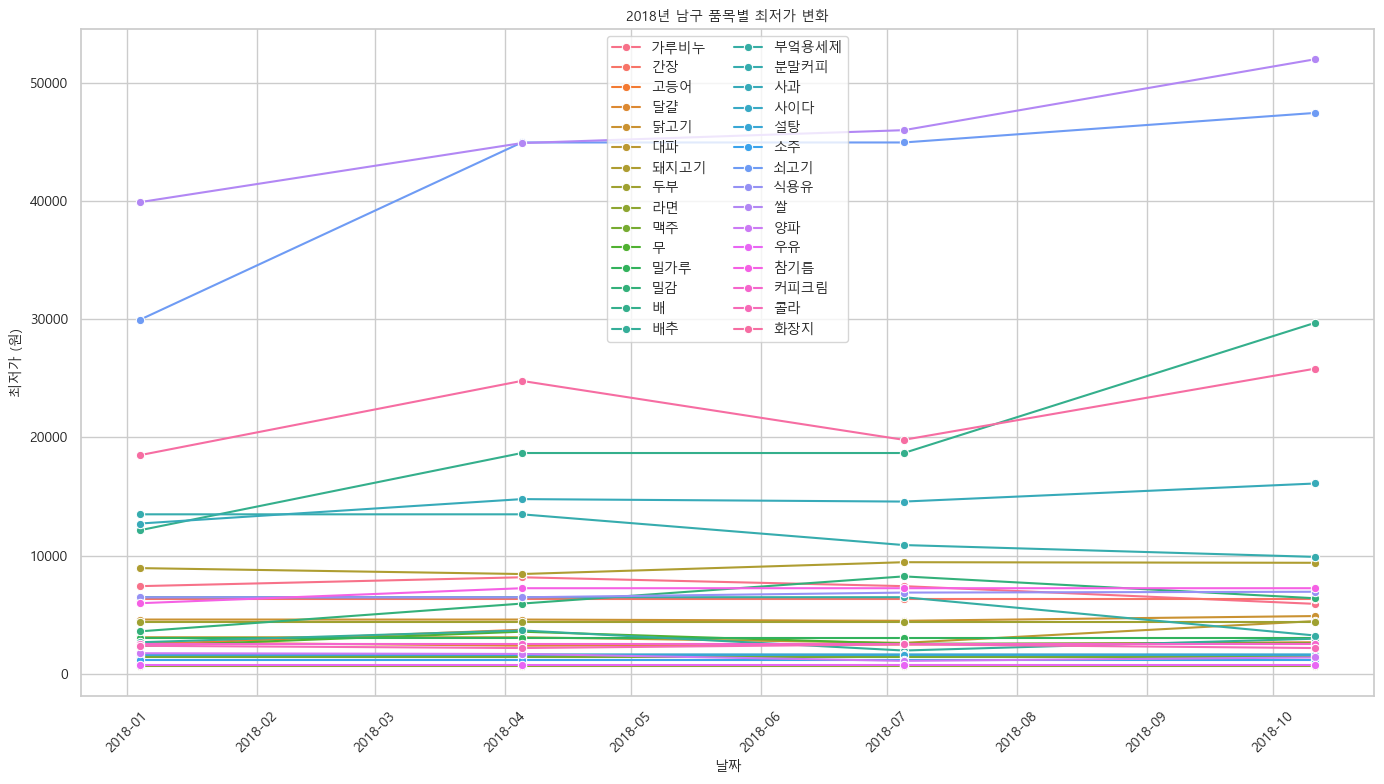

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# üìå Í∞ïÏ†úÎ°ú Ìè∞Ìä∏ ÏßÄÏ†ï
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
q1 = pd.read_csv("ÎÇ®Íµ¨2018_1q.csv")
q2 = pd.read_csv("ÎÇ®Íµ¨2018_2q.csv")
q3 = pd.read_csv("ÎÇ®Íµ¨2018_3q.csv")
q4 = pd.read_csv("ÎÇ®Íµ¨2018_4q.csv")

# ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["ÎÇ†Ïßú"] = pd.to_datetime(df_all["ÎÇ†Ïßú"])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# ÏÑ†Í∑∏ÎûòÌîÑ
sns.lineplot(data=df_all, x="ÎÇ†Ïßú", y="ÏµúÏ†ÄÍ∞Ä", hue="ÌíàÎ™©", marker="o")

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞ (Ïó¨Í∏∞ÏÑú FontProperties Ï†ÅÏö©!)
plt.title("2018ÎÖÑ ÎÇ®Íµ¨ ÌíàÎ™©Î≥Ñ ÏµúÏ†ÄÍ∞Ä Î≥ÄÌôî", fontsize=16, fontproperties=font_prop)
plt.xlabel("ÎÇ†Ïßú", fontproperties=font_prop)
plt.ylabel("ÏµúÏ†ÄÍ∞Ä (Ïõê)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_allÏùÑ Ï†ÄÏû•ÌïòÎäî ÏΩîÎìú
df_all.to_csv("ÎÇ®Íµ¨2018_min.csv", index=False, encoding="utf-8-sig")

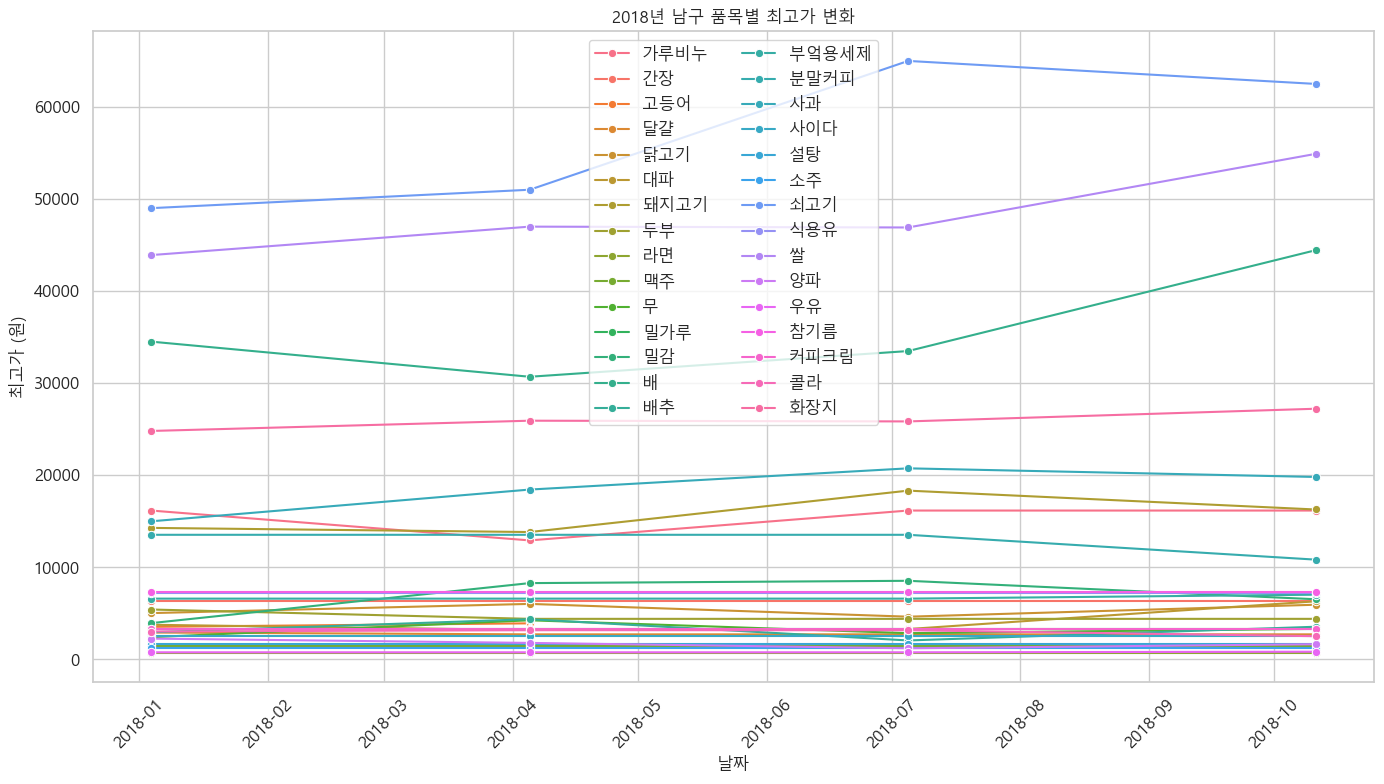

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# üìå Í∞ïÏ†úÎ°ú Ìè∞Ìä∏ ÏßÄÏ†ï
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
q1 = pd.read_csv("ÎÇ®Íµ¨2018_1q.csv")
q2 = pd.read_csv("ÎÇ®Íµ¨2018_2q.csv")
q3 = pd.read_csv("ÎÇ®Íµ¨2018_3q.csv")
q4 = pd.read_csv("ÎÇ®Íµ¨2018_4q.csv")

# ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["ÎÇ†Ïßú"] = pd.to_datetime(df_all["ÎÇ†Ïßú"])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# ÏÑ†Í∑∏ÎûòÌîÑ
sns.lineplot(data=df_all, x="ÎÇ†Ïßú", y="ÏµúÍ≥†Í∞Ä", hue="ÌíàÎ™©", marker="o")

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞ (Ïó¨Í∏∞ÏÑú FontProperties Ï†ÅÏö©!)
plt.title("2018ÎÖÑ ÎÇ®Íµ¨ ÌíàÎ™©Î≥Ñ ÏµúÍ≥†Í∞Ä Î≥ÄÌôî", fontsize=16, fontproperties=font_prop)
plt.xlabel("ÎÇ†Ïßú", fontproperties=font_prop)
plt.ylabel("ÏµúÍ≥†Í∞Ä (Ïõê)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_allÏùÑ Ï†ÄÏû•ÌïòÎäî ÏΩîÎìú
df_all.to_csv("ÎÇ®Íµ¨2018_max.csv", index=False, encoding="utf-8-sig")